<a href="https://colab.research.google.com/github/pbhopalka/ML-training/blob/master/ML_algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

y = mx + c

## Implementing using maths directly

In [0]:
import theano
import theano.tensor as th
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Creating the data objects and the linear regression equation

x = th.fvector('x')
y = th.fvector('y')

# Using shared makes sure that if value of m changes, it will take that new value.
# So m and c are shared through all iterations
m = theano.shared(0.8, 'm')
c = theano.shared(0.5, 'c')

y_hat = m*x + c

In [0]:
# Implementing cost function and training function

cost = th.mean(th.square(y - y_hat))/2
learning_rate = 0.07
m_new = m - learning_rate*th.grad(cost, m)
c_new = c - learning_rate*th.grad(cost, c)

train = theano.function(inputs=[x, y], outputs=cost, updates=[(m, m_new), (c, c_new)])

In [0]:
# Input data

area = [1.2, 2.4, 3.5, 6.1, 7.5, 9.2, 4.2, 3.5, 1.6]
price = [180, 280, 320, 720, 760, 870, 370, 390, 210]

area = np.array(area, dtype="float32")
price = np.array(price, dtype="float32")

In [0]:
# Iteration for training

for i in range(100):
  cost_val = train(area, price)
  # You can comment the print below after you know that learning is good
  # print(cost_val)

print("Final value of m:", m.get_value())
print("Final value of c:", c.get_value())

Final value of m: 92.8284860731418
Final value of c: 51.23593052272081


If you change number of iterations to number higher than 100 also, there is not much change in the cost_val and the final value of m and c. So you need to find the right number of iterations

## Implementing using scikit-learn without coding the maths

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

In [0]:
# Input data

area = [1.2, 2.4, 3.5, 6.1, 7.5, 9.2, 4.2, 3.5, 1.6]
price = [180, 280, 320, 720, 760, 870, 370, 390, 210]

# Converting to a 2D array because scikit-learn expects in the certain format
area = np.array(area).reshape(9,1)
price = np.array(price, dtype="float32")

In [0]:
# Creating model using Stochastic Gradient Descent

# max_iter = total number of maximum iterations
# learning_rate (invscaling) = says that choose a learning rate and reduce the learning rate automatically
# tol = stop the iteration if the difference between current and previous is this value
# random_state = seed for random numbers (for predictability)

model = SGDRegressor(learning_rate='invscaling', max_iter=112500, tol=1e-4, random_state=5)

If your max_iter in the model gets over, before it reaches the tol defined in the model, it gives a warning of MaxConvergeWarning. To fix the warning, you need to increase your iterations so that the cost function can be further optimized

In [0]:
# Training the model

model.fit(area, price)

print("Value of m: ", model.coef_)
print("Value of c: ", model.intercept_)

Value of m:  [92.80769678]
Value of c:  [51.32612339]


In [0]:
# Predicting the value

model.predict([[1.7]])

array([209.09920792])

## Working with real data

Generally these are the steps for working with real data:
<ul>
  <li>Data exploration</li>
  <li>Cleaning</li>
  <li>Feature Engineering: Extraction and selection</li>
  <li>Pre-processing</li>
  <li>Machine Learning model</li>
  <li>Evaluation of performance</li>
  <li>Optimizing model for prediction</li>
  <li>Exporting trained model</li>
  <li>Deployment</li>
  <li>Monitoring</li>
</ul>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data exploration

In [0]:
# Using the data from http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

data_file = pd.read_excel('/content/Folds5x2_pp.xlsx')
print(data_file.shape)
print(data_file.head())
print(data_file.info())

(9568, 5)
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


### Data cleaning

In [0]:
print(data_file.duplicated().sum())
print(data_file.isnull().sum())

41
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


As it is naturally possible to have duplicates with this kind of data, based on the understanding, so we will not drop the duplicates, although we can see there are total of 41 duplicates

### Feature Engineering

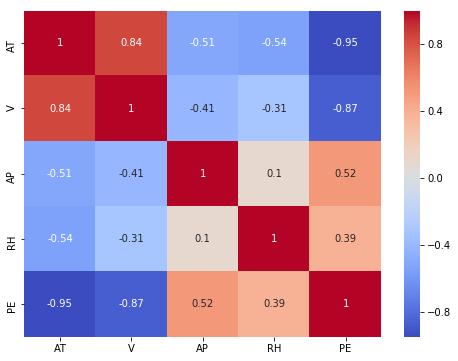

In [0]:
# Using correlation here so that we can see if linear regression is going to be 
# a good fit. 

cor = data_file.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

As can be seen from the chart above, PE (which is our label) has a good correlation with all the other variables. This means that every other variable will impact it directly and therefore Linear Regression is a good fit.

### Pre-processing

In [0]:
# Creating x and y from the input data_file

x = data_file.drop(["PE"], axis=1)
y = data_file['PE']

In [0]:
# Creating training set and validation set

from sklearn.model_selection import train_test_split
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2)

x.info()
x_training.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 4 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
dtypes: float64(4)
memory usage: 299.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7654 entries, 445 to 3079
Data columns (total 4 columns):
AT    7654 non-null float64
V     7654 non-null float64
AP    7654 non-null float64
RH    7654 non-null float64
dtypes: float64(4)
memory usage: 299.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 5979 to 5104
Data columns (total 4 columns):
AT    1914 non-null float64
V     1914 non-null float64
AP    1914 non-null float64
RH    1914 non-null float64
dtypes: float64(4)
memory usage: 74.8 KB


### Machine Learning model

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluation of performance

In [0]:
# Testing for only 1 data

# Actual input from file (14.96  41.76  1024.07  73.17) 
# Actual output from file = 463.26

test_input = np.array([14.96, 41.76, 1024.07, 73.17]).reshape(1, 4)
model.predict(test_input)

array([467.21799561])

If you notice the output value is different. So you will almost never get the exact values. Its always an approximation.

In [0]:
# Let's do prediction with the test data we prepared and then see how good it is 
# with using r-squared score. 

# If r2_score is higher then the prediction is good

y_pred = model.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9272711555666701

### Export trained model

In [0]:
import joblib

# Extension can really be almost anything. The reason most people give .pickle is 
# that many people used the pickle library previously for saving, which used to 
# create .pickle extensions
joblib.dump(model, '/content/model_test.pickle')

['/content/model_test.pickle']

### Using already trained model

In [0]:
import joblib

model = joblib.load('/content/model_test.pickle')
model.predict([[14.96, 41.76, 1024.07, 73.17]])

array([467.21799561])

# Logistic Regression

Used for classification (not for regression)

But it is an extension of Linear Regression

## Experimenting with some banking data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data exploration

In [0]:
data_file = pd.read_csv('/content/Bank_churn_modelling.csv')

print(data_file.shape)
print(data_file.columns)
print(data_file.info())

(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In the info() information, if type is object, then it means that there are things like . or ? or impurities like that

In [0]:
# Looking at all the unique values for the Geography

print(data_file["Geography"].unique())
print(data_file["Tenure"].unique())

['France' 'Spain' 'Germany']
[ 2  1  8  7  4  6  3 10  5  9  0]


### Data cleaning

In [0]:
print(data_file.duplicated().sum())
print(data_file.isnull().sum())

print(data_file.columns)
data_file.drop(labels=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

print(data_file.columns)

0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


### Feature Engineering

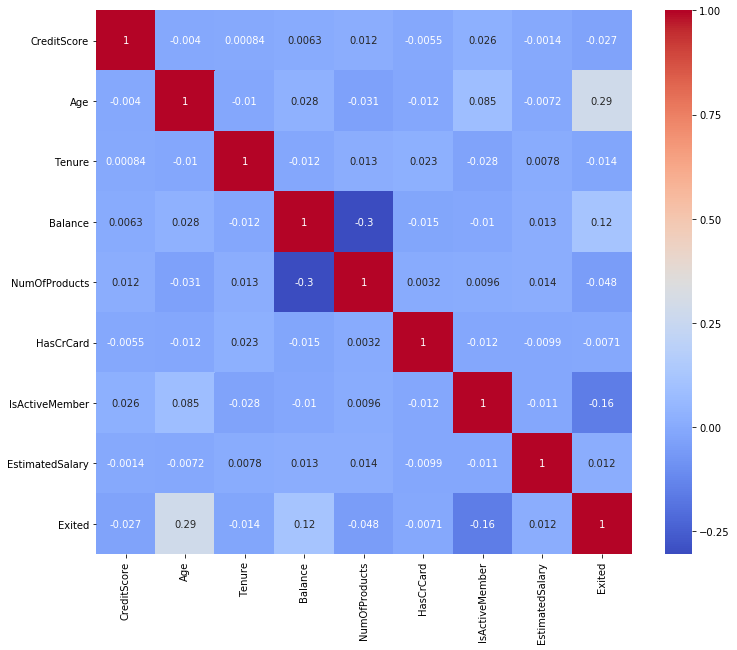

In [0]:
cor = data_file.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

If you look at the heat map, then we can see that no column has really good correlation with the label (i.e. Exited). So this is not a good candidate for Linear Regression. Maybe more of Logistic Regression.

### Pre-processing

In [0]:
# Creating x and y data from data_file

x = data_file.drop(["Exited"], axis=1)
y = data_file["Exited"]

In [0]:
# Because geography and gender are categorical values, we need them to be converted 
# to numerical values. So we will encode these values

from sklearn.preprocessing import LabelEncoder

geography_encoder = LabelEncoder()
gender_encoder = LabelEncoder()

x["Geography"] = geography_encoder.fit_transform(x["Geography"])
x["Gender"] = gender_encoder.fit_transform(x["Gender"])

print(x.head())

   CreditScore  Geography  Gender  ...  HasCrCard  IsActiveMember  EstimatedSalary
0          619          0       0  ...          1               1        101348.88
1          608          2       0  ...          0               1        112542.58
2          502          0       0  ...          1               0        113931.57
3          699          0       0  ...          0               0         93826.63
4          850          2       0  ...          1               1         79084.10

[5 rows x 10 columns]


Here, gender is 0 and 1 (which are binary), so there is no issue.

But as far as geography is concerned, it became 0, 1 and 2 (which will behave like a numerical data). So, we need to one-hot encode the geography_encode further.

In [0]:
# One-hot encoding of Geography

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(categorical_features=[1])
x = one_hot_encoder.fit_transform(x).toarray()

x.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(10000, 12)

In [0]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

print(x.shape)

(10000, 12)


In [0]:
from sklearn.model_selection import train_test_split

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

### Machine Learning Model

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=5)
model.fit(x_training, y_training)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation of performance

In [0]:
# Testing for dummy data
'''
france, 650, female, age=52, tenure=3, balance=456212, numOfProd=3, crCard=1, active=1, salary=354682
'''
input_data = [1, 0, 0, 650, 0, 52, 3, 456212, 3, 1, 1, 354682]
input_data = np.array(input_data).reshape(1, 12)
model.predict(input_data)

array([1])

In [0]:
# Checking for accuracy

y_pred = model.predict(x_test)

from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.809
0.19753086419753085
[[1538   57]
 [ 325   80]]
0.583941605839416
0.29520295202952024


For logistic regression, accuracy is a good measure of performance. But for linear regression, it isn't.


But based on business objective, we need to see if only accuracy is the right measure of performance. In this case, recall is a good measure. Higher the recall, better the performance.

There are other performance metrics as well like confusion matrix, precision and f1 score

# Decision Tree

Check for entropy for all data, then split based on that, then continue recursively

We are going to use the same dataset that is used in Logistic Regression section.

Let's start with just building the model

In [0]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', random_state=5)

decision_tree_model.fit(x_training, y_training)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [0]:
y_pred = decision_tree_model.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.782
0.5111111111111111


## Overfitting

In [0]:
# Checking the performance for the training data itself

print(metrics.recall_score(y_training, decision_tree_model.predict(x_training)))

1.0


Here the recall is 1.0, this means that complete data was filled. What this says is that, all data was fit properly to the training data. But it probably was overfit, because it didn't give such a good recall for test data.

### Solving overfitting

In [0]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', 
                                             random_state=5,
                                             max_depth=8, 
                                             min_samples_leaf=20,
                                             min_samples_split=40,
                                             max_leaf_nodes=30)

decision_tree_model.fit(x_training, y_training)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [0]:
y_pred = decision_tree_model.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.8545
0.42962962962962964


In [0]:
# Checking the performance for the training data itself

print(metrics.recall_score(y_training, decision_tree_model.predict(x_training)))

0.46568627450980393


Now you can see that recall for test data and training data is not so different. This means that things are good and at least there was no overfitting.

## GridSearch

In [0]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": np.arange(5, 20, 2),
    "min_samples_leaf": np.arange(10, 80, 5),
    "min_samples_split": np.arange(10, 100, 10)
}

search = GridSearchCV(DecisionTreeClassifier(random_state=5),
                      param_grid=params,
                      scoring="recall",
                      n_jobs=-1,
                      verbose=True)

search.fit(x, y)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 2565 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 3024 out of 3024 | elapsed:   59.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=5,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_leaf': array([10, 1

In [0]:
print(search.best_params_)
print(search.best_score_)

{'max_depth': 13, 'min_samples_leaf': 10, 'min_samples_split': 30}
0.5022091310751104


## Visualizing Decision Tree

In [0]:
import graphviz
from sklearn import tree

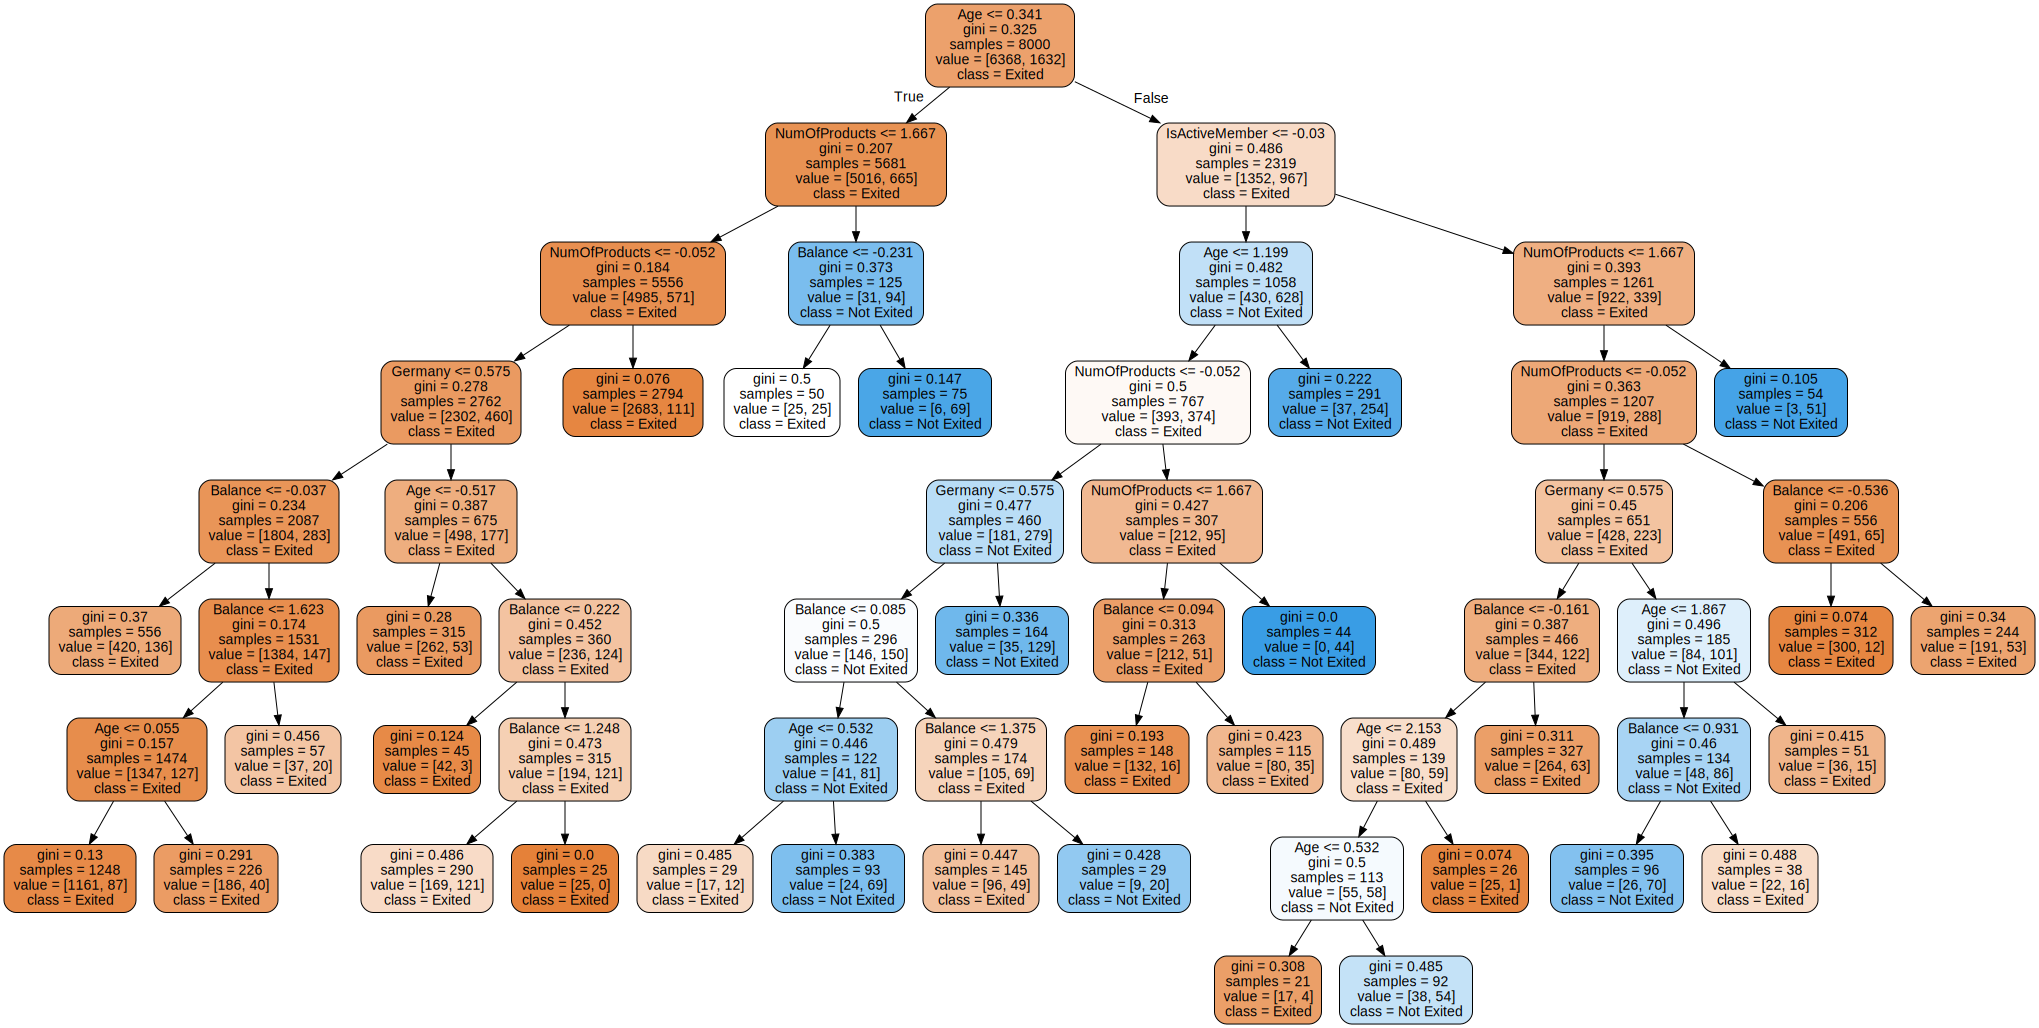

In [0]:
fnames = ['France', 'Germany', 'Spain', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

cnames = ['Exited', 'Not Exited']

graph_data = tree.export_graphviz(decision_tree_model, 
                                  out_file=None,
                                  feature_names=fnames,
                                  class_names=cnames,
                                  rounded=True,
                                  filled=True)

graph = graphviz.Source(graph_data)
graph

## Random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,
                                       random_state=5)

random_forest.fit(x_training, y_training)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

### Evaluation of performance

In [0]:
# For test data
print(metrics.recall_score(y_test, random_forest.predict(x_test)))

# For training data
print(metrics.recall_score(y_training, random_forest.predict(x_training)))

0.4567901234567901
1.0


This is a small data set. So since there is an overfitting with training data, so random forest is not a good model for this kind of dataset. We need really huge datasets, which can have multiple patterns.

# Neural Network

## Implementing a very simple 1-layer NN

In [0]:
import numpy as np

x = np.array([1.0, 1.0, 1.0])
y = np.array([30.0])

w = np.array([0.2, 0.3, 0.1])
alpha = 0.01

In [0]:
for i in range(80):
  z = np.dot(x, w)

  # Applying activation function
  y_hat = 2 * z

  # Updating weights
  w = w - alpha * (y_hat - y) * 2*x
  print(y_hat)

1.2
4.656000000000001
7.69728
10.3736064
12.728773632000001
14.801320796159999
16.6251623006208
18.230142824546306
19.642525685600745
20.885422603328657
21.97917189092922
22.941671264017714
23.788670712335588
24.534030226855315
25.189946599632677
25.767153007676754
26.27509464675554
26.722083289144877
27.11543329444749
27.461581299113792
27.76619154322014
28.034248558033717
28.27013873106967
28.477722083341312
28.660395433340355
28.82114798133951
28.96261022357877
29.087096996749317
29.196645357139403
29.293047914282674
29.377882164568753
29.452536304820505
29.518231948242047
29.576044114453
29.626918820718643
29.671688562232404
29.71108593476451
29.74575562259277
29.776264947881636
29.803113154135843
29.826739575639543
29.847530826562796
29.86582712737526
29.881927872090227
29.896096527439397
29.90856494414667
29.919537150849067
29.92919269274718
29.937689569617522
29.94516682126342
29.95174680271181
29.957537186386393
29.962632724020025
29.96711679713762
29.97106278148111
29.97453524

## MNIST dataset

In [0]:
from keras import datasets
from keras import models, layers
from keras.utils.np_utils import to_categorical

In [0]:
# Loading dataset from keras (it has some standard datasets already available)

(x_training, y_training), (x_test, y_test) = datasets.mnist.load_data()

print(x_training.shape)
print(y_training.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


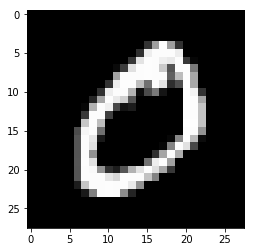

0


In [0]:
# Data exploration

import matplotlib.pyplot as plt

plt.imshow(x_training[1], cmap="gray")
plt.show()

print(y_training[1])

In [0]:
# IMPORTANT: Make sure not to run this again otherwise, it will update in itself

# Pre-processing

# One-hot encoding of labels

y_training = to_categorical(y_training)
y_test = to_categorical(y_test)

print(y_training.shape)
print(y_test.shape)

# Scaling the images - for dimensionality reduction

x_training = x_training/255
y_training = y_training/255

(60000, 10)
(10000, 10)


In [0]:
# Building the model

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [0]:
# Training the model

model.fit(x_training, y_training, batch_size=1000, epochs=10, verbose=True)

Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0037 - acc: 0.7585
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0014 - acc: 0.9030
Epoch 3/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0011 - acc: 0.9232
Epoch 4/10
60000/60000 [==============================] - 1s 15us/step - loss: 9.3704e-04 - acc: 0.9346
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 8.2109e-04 - acc: 0.9420
Epoch 6/10
60000/60000 [==============================] - 1s 15us/step - loss: 7.3261e-04 - acc: 0.9484
Epoch 7/10
60000/60000 [==============================] - 1s 15us/step - loss: 6.6443e-04 - acc: 0.9526
Epoch 8/10
60000/60000 [==============================] - 1s 14us/step - loss: 6.0811e-04 - acc: 0.9567
Epoch 9/10
60000/60000 [==============================] - 1s 14us/step - loss: 5.5785e-04 - acc: 0.9605
Epoch 10/10
60000/60000 [==============================] - 1s 14us/step - lo

In [0]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

10000/10000 [==============================] - 0s 30us/step
0.956


# Natural Language Processing

## Speech to Text conversion

In [0]:
!apt-get install conda && conda install pyaudio # This is not available with pyaudio it seems
# !pip install SpeechRecognition
# !pip install pyttsx3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package conda


In [0]:
import speech_recognition as sr

r = sr.Recognizer()

In [0]:
# Record audio
with sr.Microphone(0) as source:
  audio = r.listen(source, phrase_time_limit=5)

text = r.recognize_google(audio)
print(text)

AttributeError: ignored

## Text to speech conversion

In [0]:
!apt-get install espeak

In [0]:
# Text to speech
import pyttsx3

engine = pyttsx3.init()
data = "Hello everyone, hope you like Machine Leaarning"
engine.say(data)
engine.runAndWait()

## Text preprocessing

Finding patterns using regular expressions

### Text splitting

In [0]:
import re

In [0]:
# Finding the phone numbers

data = "my mobile number is 1234567890 and what is yours?"

re.findall("[0-9]{10}", data)

['1234567890']

In [0]:
data = """
My birthday is 12-12-1889 and your birthday is 01-04-1992 and his birthday is 21/03/1934
and my email id is something@text.com and his email id is test@test.com
"""

In [0]:
# Find dates

pattern = "[0-9]{1,2}-[0-9]{1,2}-[0-9]{4}|[0-9]{1,2}/[0-9]{1,2}/[0-9]{4}"
re.findall(pattern, data)

['12-12-1889', '01-04-1992', '21/03/1934']

In [0]:
# Finding emails

pattern = "[0-9a-zA-Z._]+@[a-zA-Z0-9._]+"
re.findall(pattern, data)

['something@text.com', 'test@test.com']

In [0]:
data = "Bengaluru (also called Bangalore) is the capital of Karnataka."
data += " Mr. Mac is visiting my house to clean it."
data += " Can you help me with your car today? Thanks!"
data += " I need some help please connect on something@test.com."
data += " Thanks for informing me."

print (data)

Bengaluru (also called Bangalore) is the capital of Karnataka. Mr. Mac is visiting my house to clean it. Can you help me with your car today? Thanks! I need some help please connect on something@test.com. Thanks for informing me.


In [0]:
data.split(".")

['Bengaluru (also called Bangalore) is the capital of Karnataka',
 ' Mr',
 ' Mac is visiting my house to clean it',
 ' Can you help me with your car today? Thanks! I need some help please connect on something@test',
 'com',
 ' Thanks for informing me',
 '']

In [0]:
import nltk
# Downloading libraries for punctuations and word vocabulary
nltk.download("punkt")
nltk.download("wordnet")

#Downloading libraries for parts of speech, list of tags for parts of speech, chunking data and downloads words
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')

nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [0]:
print(nltk.sent_tokenize(data))
print(nltk.word_tokenize(data))

['Bengaluru (also called Bangalore) is the capital of Karnataka.', 'Mr. Mac is visiting my house to clean it.', 'Can you help me with your car today?', 'Thanks!', 'I need some help please connect on something@test.com.', 'Thanks for informing me.']
['Bengaluru', '(', 'also', 'called', 'Bangalore', ')', 'is', 'the', 'capital', 'of', 'Karnataka', '.', 'Mr.', 'Mac', 'is', 'visiting', 'my', 'house', 'to', 'clean', 'it', '.', 'Can', 'you', 'help', 'me', 'with', 'your', 'car', 'today', '?', 'Thanks', '!', 'I', 'need', 'some', 'help', 'please', 'connect', 'on', 'something', '@', 'test.com', '.', 'Thanks', 'for', 'informing', 'me', '.']


### Morphological Analysis - converting word to its root form

Stemming - Faster, less accurate, works on spelling level <br>
Lemmatization - Slower, more accurate, works on meaning level

In [0]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
print(ps.stem("cars"))
print(ps.stem("boys"))
print(ps.stem("boxes"))
print(ps.stem("wives"))
print(ps.stem("children"))

car
boy
box
wive


In [0]:
from nltk.stem import WordNetLemmatizer

wd = WordNetLemmatizer()
print(wd.lemmatize("cars"))
print(wd.lemmatize("boys"))
print(wd.lemmatize("boxes"))
print(wd.lemmatize("wives"))
print(wd.lemmatize("children"))

car
boy
box
wife
child


### Part of speech

In [0]:
data = "John bought a watch in Delhi and he liked it."
print(nltk.pos_tag(nltk.word_tokenize(data)))
nltk.help.upenn_tagset("NNP")

[('John', 'NNP'), ('bought', 'VBD'), ('a', 'DT'), ('watch', 'NN'), ('in', 'IN'), ('Delhi', 'NNP'), ('and', 'CC'), ('he', 'PRP'), ('liked', 'VBD'), ('it', 'PRP'), ('.', '.')]
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [0]:
data = "Rajesh Kumar is a manager of ABC Information Pvt Ltd and he is from India"
print(nltk.chunk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(data))))

(S
  (PERSON Rajesh/NNP)
  (PERSON Kumar/NNP)
  is/VBZ
  a/DT
  manager/NN
  of/IN
  (ORGANIZATION ABC/NNP Information/NNP Pvt/NNP Ltd/NNP)
  and/CC
  he/PRP
  is/VBZ
  from/IN
  (GPE India/NNP))


## Email classifier

In [0]:
# Loading the dataset

from sklearn import datasets

train_data = datasets.fetch_20newsgroups(subset="train")
test_data = datasets.fetch_20newsgroups(subset="test")

x_training = train_data.data
y_training = train_data.target
x_test = test_data.data
y_test = test_data.target

print(len(x_training))
print(len(y_training))
print(len(x_test))
print(len(y_test))

11314
11314
7532
7532


In [0]:
# Exploring the dataset
print(x_training[150])
print(y_training[150])

print(train_data.target_names[y_training[150]])

From: weston@ucssun1.sdsu.edu (weston t)
Subject: graphical representation of vector-valued functions
Organization: SDSU Computing Services
Lines: 13
NNTP-Posting-Host: ucssun1.sdsu.edu

gnuplot, etc. make it easy to plot real valued functions of 2 variables
but I want to plot functions whose values are 2-vectors. I have been 
doing this by plotting arrays of arrows (complete with arrowheads) but
before going further, I thought I would ask whether someone has already
done the work. Any pointers??

thanx in advance


Tom Weston                    | USENET: weston@ucssun1.sdsu.edu
Department of Philosophy      | (619) 594-6218 (office)
San Diego State Univ.         | (619) 575-7477 (home)
San Diego, CA 92182-0303      | 

1
comp.graphics


In [0]:
# Data cleaning

import re

for i in range(len(x_training)):
  doc = x_training[i]
  # Removing all emails
  doc = re.sub("[a-zA-Z0-9._]+@[a-zA-Z0-9._]+", "", doc)
  # Removing numbers
  doc = re.sub("[0-9]+[0-9a-zA-Z._]+", "", doc)
  # Removing underscores from words
  doc = re.sub("_", "", doc)

  x_training[i] = doc

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(lowercase=True, 
                         stop_words="english",
                         min_df=20,
                         max_df=0.90,
                         ngram_range=(1,2))
vector.fit(x_training)
print(len(vector.get_feature_names()))
print(vector.get_feature_names()[:100])

10464
['aa', 'aaa', 'aaron', 'aaron ray', 'ab', 'abandon', 'abandoned', 'abc', 'abiding', 'abiding citizens', 'abilities', 'ability', 'able', 'able help', 'able tell', 'able use', 'abolish', 'abortion', 'abraham', 'abroad', 'abs', 'absence', 'absolute', 'absolute truth', 'absolutely', 'abstract', 'absurd', 'abuse', 'abused', 'abuses', 'ac', 'ac uk', 'acad', 'academic', 'academic computer', 'academic computing', 'academy', 'accelerate', 'accelerated', 'acceleration', 'accelerator', 'accelerators', 'accept', 'acceptable', 'acceptance', 'acceptance wiretap', 'accepted', 'accepting', 'accepting jeesus', 'accepts', 'access', 'access digex', 'access online', 'access unix', 'accessed', 'accessible', 'accessories', 'accident', 'accidental', 'accidentally', 'accidents', 'accompanied', 'accomplish', 'accomplished', 'accord', 'accordance', 'according', 'account', 'accounting', 'accounts', 'accuracy', 'accuracy information', 'accurate', 'accurately', 'accuse', 'accused', 'ace', 'achieve', 'achieve

In [0]:
# Convert the data into vectors

x_train = vector.transform(x_training).toarray()
print(x_train.shape)

(11314, 10464)


In [0]:
# Machine Learning model

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(x_train, y_training)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Evaluating performance

from sklearn import metrics

print(metrics.accuracy_score(y_training, model.predict(x_train)))
print(metrics.accuracy_score(y_test, model.predict(vector.transform(x_test))))

0.9232808909315892
0.7875730217737653


Better feature engineering could possibly yield better accuracy

In [0]:
input_data = """
Hi, my computer has started becoming slow, its windows 98 cersion 1.
I am using it from long and the cursor sometimes stops moving.
I am stuck with this issue, the native applications are also not responding.
Please suggest something.
"""

out = model.predict(vector.transform([input_data]))
print(out)
print(train_data.target_names[out[0]])

[5]
comp.windows.x


## Spelling correction

Using Jaccard distance

In [0]:
import nltk
nltk.jaccard_distance(set("Orange"), set("Orenge"))

# if the value is low, then it is similar word

0.16666666666666666

You can also use n-grams for increasing accuracy

In [0]:
w1 = nltk.ngrams("Orange", 2)
w2 = nltk.ngrams("Orenge", 2)

nltk.jaccard_distance(set(w1), set(w2))

0.5714285714285714